In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
heart_disease = pd.read_csv("heart_disease.csv")

In [3]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
heart_disease.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [51]:
X = heart_disease.drop(['target'],axis = 'columns')
y = heart_disease.target
pred=[]

In [52]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
len(x_train),len(x_test)

(242, 61)

LOGISTIC REGRESSION

In [53]:
from sklearn import linear_model
lreg=linear_model.LogisticRegression(multi_class='ovr',solver='liblinear')
lreg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [54]:
print("accuracy: ",lreg.score(x_test,y_test)*100)

accuracy:  86.88524590163934


In [55]:
from sklearn.model_selection import cross_val_score

print("\ncross validation scores:\n")
scores = cross_val_score(lreg,x_train,y_train,cv=5)
print("train data:\n","mean:%0.4f"%scores.mean()," stddev:%0.4f"%scores.std())


scores = cross_val_score(lreg,x_test,y_test,cv=5)
print("test data:\n","mean:%0.4f"%scores.mean()," stddev:%0.4f"%scores.std())


cross validation scores:

train data:
 mean:0.8057  stddev:0.0342
test data:
 mean:0.7427  stddev:0.0973


In [56]:
from sklearn.metrics import classification_report

y_pred = lreg.predict(x_test)
pred.append(y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        28
           1       0.88      0.88      0.88        33

   micro avg       0.87      0.87      0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



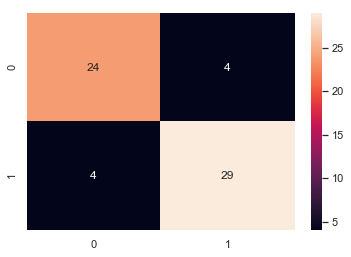

In [57]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix,annot=True)
plt.show()

RANDOM FOREST

In [58]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=12)
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=12, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [59]:
print("accuracy: ",rfc.score(x_test,y_test)*100)

accuracy:  83.60655737704919


In [60]:
print("\ncross validation scores:\n")
scores = cross_val_score(rfc,x_train,y_train,cv=5)
print("train data:\n","mean:%0.4f"%scores.mean()," stddev:%0.4f"%scores.std())


scores = cross_val_score(rfc,x_test,y_test,cv=5)
print("test data:\n","mean:%0.4f"%scores.mean()," stddev:%0.4f"%scores.std())


cross validation scores:

train data:
 mean:0.8304  stddev:0.0407
test data:
 mean:0.7273  stddev:0.1197


In [61]:
y_pred = rfc.predict(x_test)
pred.append(y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        28
           1       0.85      0.85      0.85        33

   micro avg       0.84      0.84      0.84        61
   macro avg       0.83      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



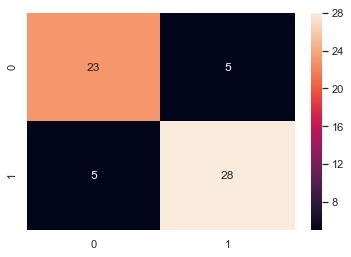

In [62]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix,annot=True)
plt.show()

GAUSSIAN NAIVE BAYES

In [63]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [64]:
print("accuracy: ",gnb.score(x_test,y_test)*100)

accuracy:  85.24590163934425


In [65]:
print("\ncross validation scores:\n")
scores = cross_val_score(gnb,x_train,y_train,cv=5)
print("train data:\n","mean:%0.4f"%scores.mean()," stddev:%0.4f"%scores.std())


scores = cross_val_score(gnb,x_test,y_test,cv=5)
print("test data:\n","mean:%0.4f"%scores.mean()," stddev:%0.4f"%scores.std())


cross validation scores:

train data:
 mean:0.8099  stddev:0.0405
test data:
 mean:0.7175  stddev:0.1987


In [66]:
y_pred = gnb.predict(x_test)
pred.append(y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84        28
           1       0.88      0.85      0.86        33

   micro avg       0.85      0.85      0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



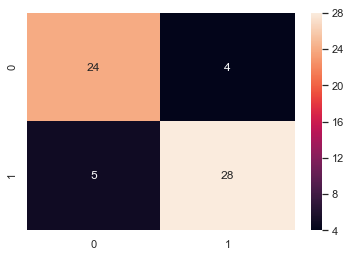

In [67]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix,annot=True)
plt.show()

K NEAREST NEIGHBOURS 

In [68]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=4)
neigh.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')

In [69]:
print("accuracy: ",neigh.score(x_test,y_test)*100)

accuracy:  63.934426229508205


In [70]:
print("\ncross validation scores:\n")
scores = cross_val_score(neigh,x_train,y_train,cv=5)
print("train data:\n","mean:%0.4f"%scores.mean()," stddev:%0.4f"%scores.std())


scores = cross_val_score(neigh,x_test,y_test,cv=5)
print("test data:\n","mean:%0.4f"%scores.mean()," stddev:%0.4f"%scores.std())


cross validation scores:

train data:
 mean:0.6239  stddev:0.0166
test data:
 mean:0.6811  stddev:0.1378


In [71]:
y_pred = neigh.predict(x_test)
pred.append(y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.82      0.68        28
           1       0.76      0.48      0.59        33

   micro avg       0.64      0.64      0.64        61
   macro avg       0.67      0.65      0.63        61
weighted avg       0.68      0.64      0.63        61



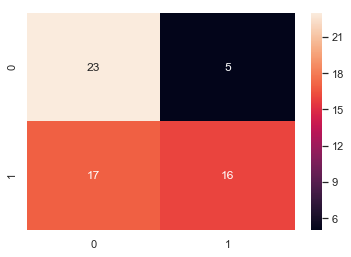

In [72]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix,annot=True)
plt.show()

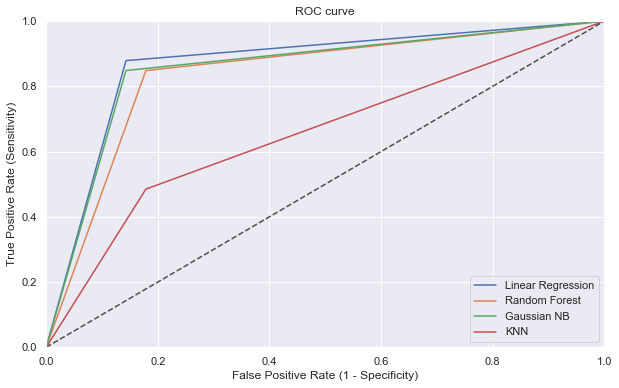

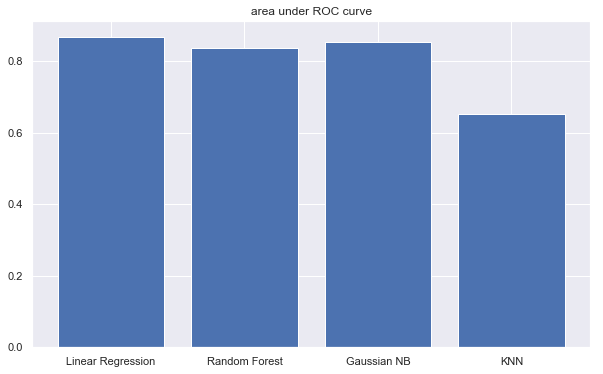

In [73]:
from sklearn.metrics import roc_curve, auc

sns.set()

area=[]

# AOC curve plot

fig, ax = plt.subplots(figsize=(10,6))

algorithms=['Linear Regression','Random Forest','Gaussian NB','KNN']

for i in range(len(pred)):
    f_pr, t_pr, t_hold = roc_curve(y_test,pred[i])
    ax.plot(f_pr, t_pr,label=algorithms[i])
    area.append(auc(f_pr,t_pr))
    
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 16
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend()
plt.grid(True)

# auc plot

plt.figure(figsize=(10,6))

plt.bar(algorithms,area)

plt.title("area under ROC curve")

plt.show()


area under the curve :

0.90 - 1.00 = excellent

0.80 - 0.90 = good

0.70 - 0.80 = fair

0.60 - 0.70 = poor

0.50 - 0.60 = fail